# Связный список - неупорядоченный список
Для реализации неупорядоченного списка мы создадим то, что обычно называют связанным списком. Напомним: мы должны быть уверены, что сможем поддерживать порядок взаимного расположения элементов. Однако, такое позиционирование не обязательно должно быть на смежных участках памяти. Рассмотрим для примера коллекцию элементов, показанную на рисунке 1. Похоже, эти значения были размещены случайным образом. Если мы сможем сохранить в каждом элементе некую явную информацию о размещении его соседа (см. рисунок 2), то соответствующая позиция каждого из них может быть выражена простой ссылкой от одного к другому.

#### Рисунок 1: Элементы не ограничены в своём физическом размещении.
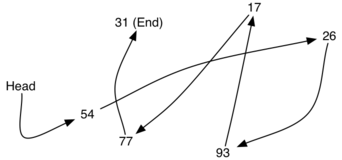

#### Рисунок 2: Соответствующие позиции определяются с помощью явных ссылок.
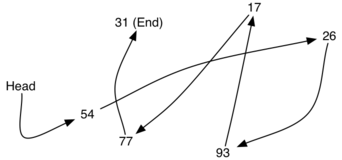

#### Вот так вот выглядит пустая нода
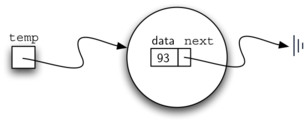

# Вершина

In [176]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None
    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext

In [177]:
a = Node(1)
b = Node(2)

In [178]:
print(a.setNext(3))
print(a.getNext())

None
3


In [179]:
'head --- 54->26->93->17->77->31 --- end'

'head --- 54->26->93->17->77->31 --- end'

# Структура

In [262]:
class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    def add(self,item):
        tmp = Node(item)
        tmp.setNext(self.head)
        self.head = tmp
        
    def count(self):
        head = self.head
        i = 0
        while head is not None:
            head = head.getNext()
            i +=1
        return i
    
    def search(self, item):
        head = self.head
        i = 0
        answer = False
        while head is not None:
            value = head.getData()
            if value==item:
                answer = True
                break
            else:
                head = head.getNext()
                i +=1
        return answer
    
    def show(self):
        head = self.head
        i = 0
        a = 'head'
        while head is not None:
            a += '->' + str(head.getData())
            head = head.getNext()
            i +=1
        return (a)
    
    def delete(self,item):
        if self.search(item) == False:
            return 'Element not Found'
        else:
            i = 0
            prev = self.head
            curr = prev.getNext()
            # Если в начале попался
            if prev.getData()==item:
                self.head = curr
            j = 0
            while curr is not None:
                if curr.getData() == item:
                    prev.setNext(curr.getNext())
                    j += 1
                else:
                    pass
                i +=1
                prev = curr
                curr = curr.getNext()
            print('Element {} was deleted {} times'.format(item, j))
    
    def size(self):
        if self.isEmpty() is True:
            return 0
        else:
            i = 1
            prev = self.head
            curr = prev.getNext()
            while curr is not None:
                i +=1
                curr = curr.getNext()
            return i
        
    def pop(self):
        
        if self.isEmpty() is True:
            print( 'Linked list is Empty' )
        elif self.size() == 1:
            print('We have deleted last Node in List\n')
            self.head = None
        else:
            i = 1
            prev = self.head
            curr = prev.getNext()
            while curr is not None:
                if i + 1  == self.size():
                    prev.setNext(None)
                else:
                    prev = curr
                    curr = curr.getNext()
                i +=1
            print('size is equal =', self.size())
            print(self.show(),'\n')
            
    def __str__(self):
        current = self.head
        string = '['
        while current is not None:
            string += str(current.getData())
            if current.getNext() is not None:
                string += ', '
            current = current.getNext()
        string += ']'
        return string

In [263]:
mylist = UnorderedList()
mylist.add(1)
mylist.add(2)
mylist.add(3)
mylist.add(4)
mylist.add(5)
mylist.show()
print(mylist)

[5, 4, 3, 2, 1]


In [264]:
mylist.pop()
mylist.pop()
mylist.pop()
mylist.pop()
mylist.pop()
mylist.pop()

size is equal = 4
head->5->4->3->2 

size is equal = 3
head->5->4->3 

size is equal = 2
head->5->4 

size is equal = 1
head->5 

We have deleted last Node in List

Linked list is Empty


# Управление паматью

In [265]:
import os
import psutil
process = psutil.Process(os.getpid())
print(process.memory_info().rss/1024**2)

59.80859375


# Свзяный список - упорядоченный список


In [467]:
class OrderedList:

    def __init__(self):
        self.head = None
    
    def search(self, item):
        self.show()
        head = self.head
        i = 0
        answer = False
        
        while head is not None and head.getData() <= item:
            value = head.getData()
            print('Current value is = {}'.format(value))
            if value==item:
                answer = True
            i +=1
            head = head.getNext()
            print('Number of iteration is = {}\n'.format(i))
        return answer
    
    def show(self):
        head = self.head
        i = 0
        a = 'head'
        while head is not None:
            a += '->' + str(head.getData())
            head = head.getNext()
            i +=1
        print(a,'\n')
        #return (a)


    
    # Не понял как делается    



    def add(self,item):
        current = self.head
        previous = None
        stop = False
        
        while current != None and not stop:
            if current.getData() > item:
                stop = True
            else:
                previous = current
                current = current.getNext()
    
        temp = Node(item)
        if previous == None:
            temp.setNext(self.head)
            self.head = temp
        else:
            temp.setNext(current)
            previous.setNext(temp)

In [468]:
mylist = OrderedList()
mylist.add(2)
mylist.show()
mylist.add(22)
mylist.show()
mylist.add(23)
mylist.show()
mylist.add(3)
mylist.show()
#print(mylist.search(4))

head->2 

head->2->22 

head->2->22->23 

head->2->3->22->23 



In [ ]:
class LinkedList:

    def __init__(self):
        self.head = None
    
    def add(self,item):
        tmp = Node(item)
        tmp.setNext(self.head)
        self.head = tmp
